In [1]:
# To allow changes in .py files to be reflected in Notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
from stream import Stream
def transform_stream(stream: Stream, start: float, end: float, drift_scale: float) -> Stream:
    transformed_stream = stream
    dataset = transformed_stream.data
    if start < 1:
        cd1 = round(len(dataset)*start)
        if end < 1:
            cd2 = round(len(dataset)*end)
        if start > 1:
            cd1 = start
        if end > 1:
            cd2 = end
    labels = transformed_stream.anomaly_labels
    # in here, ratio = drift_scale (if ratio < 1 -> inc. freq.)
    val=drift_scale
    d_temp = dataset[cd1:cd2]
    wid_len = int((cd2-cd1)*val)
    d_mod = signal.resample(d_temp, wid_len) 
    l_temp = labels[cd1:cd2]
    l_mod = signal.resample(l_temp, wid_len)
    l_mod = np.round(l_mod) 
    transformed_stream.anomaly_labels = np.concatenate((labels[:cd1], l_mod, labels[cd2:]))
    transformed_stream.anomaly_labels = np.absolute(transformed_stream.anomaly_labels)
    # caution! the length of the stream data attribute is changed here
    transformed_stream.data = np.concatenate((dataset[:cd1], d_mod, dataset[cd2:]))
    transformed_stream.drift_labels = np.zeros((len(transformed_stream.anomaly_labels),1))
    transformed_stream.length = len(transformed_stream.anomaly_labels)
    return transformed_stream




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


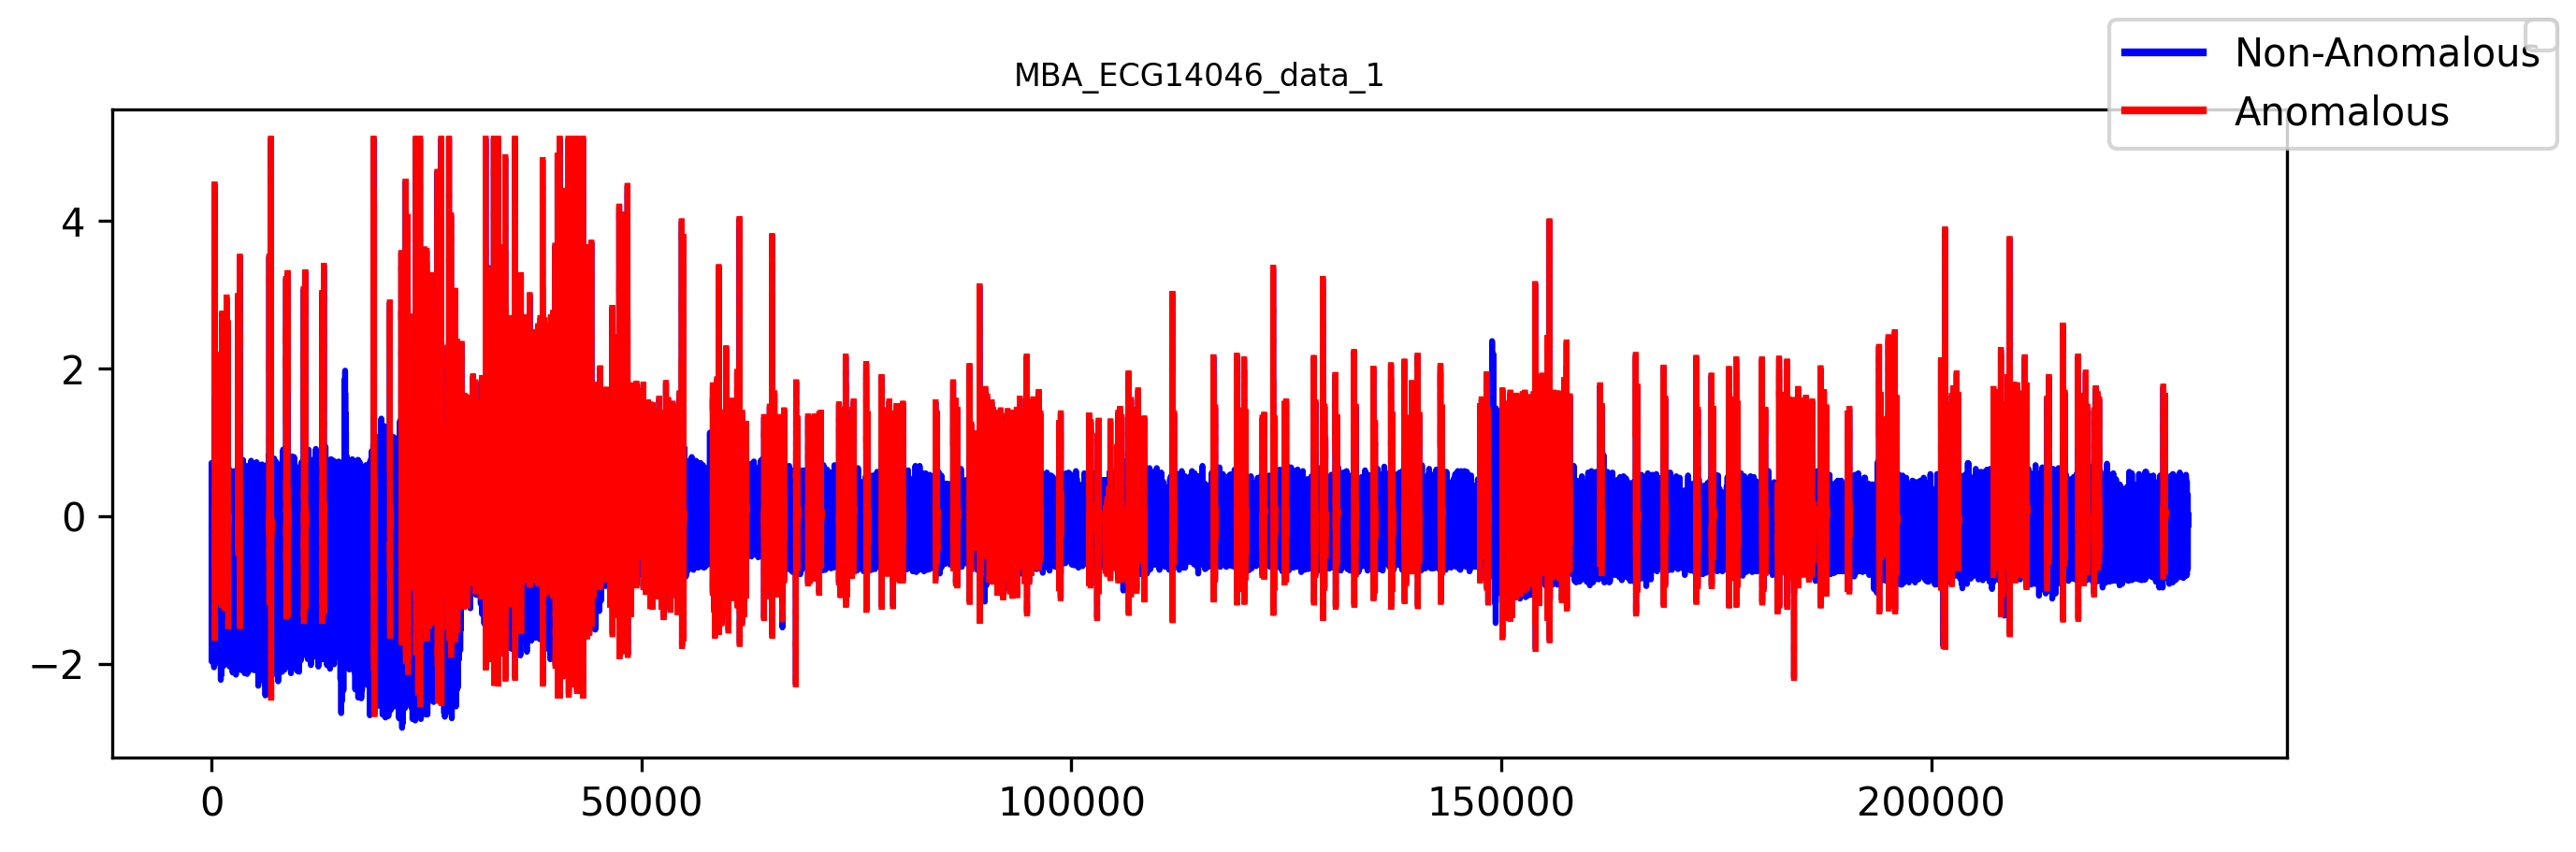

In [4]:
import arff
from stream import Stream
# replace filenames with your own path
ECG1 = Stream('/Users/akankshanehete/Desktop/CANGene/compressedStreamgen/data/benchmark/ECG/MBA_ECG14046_data_1.arff')
ECG2 = Stream('/Users/akankshanehete/Desktop/CANGene/compressedStreamgen/data/benchmark/ECG/MBA_ECG14046_data_13.arff')
ECG3 = Stream('/Users/akankshanehete/Desktop/CANGene/compressedStreamgen/data/benchmark/ECG/MBA_ECG14046_data_15.arff')
ECG1.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


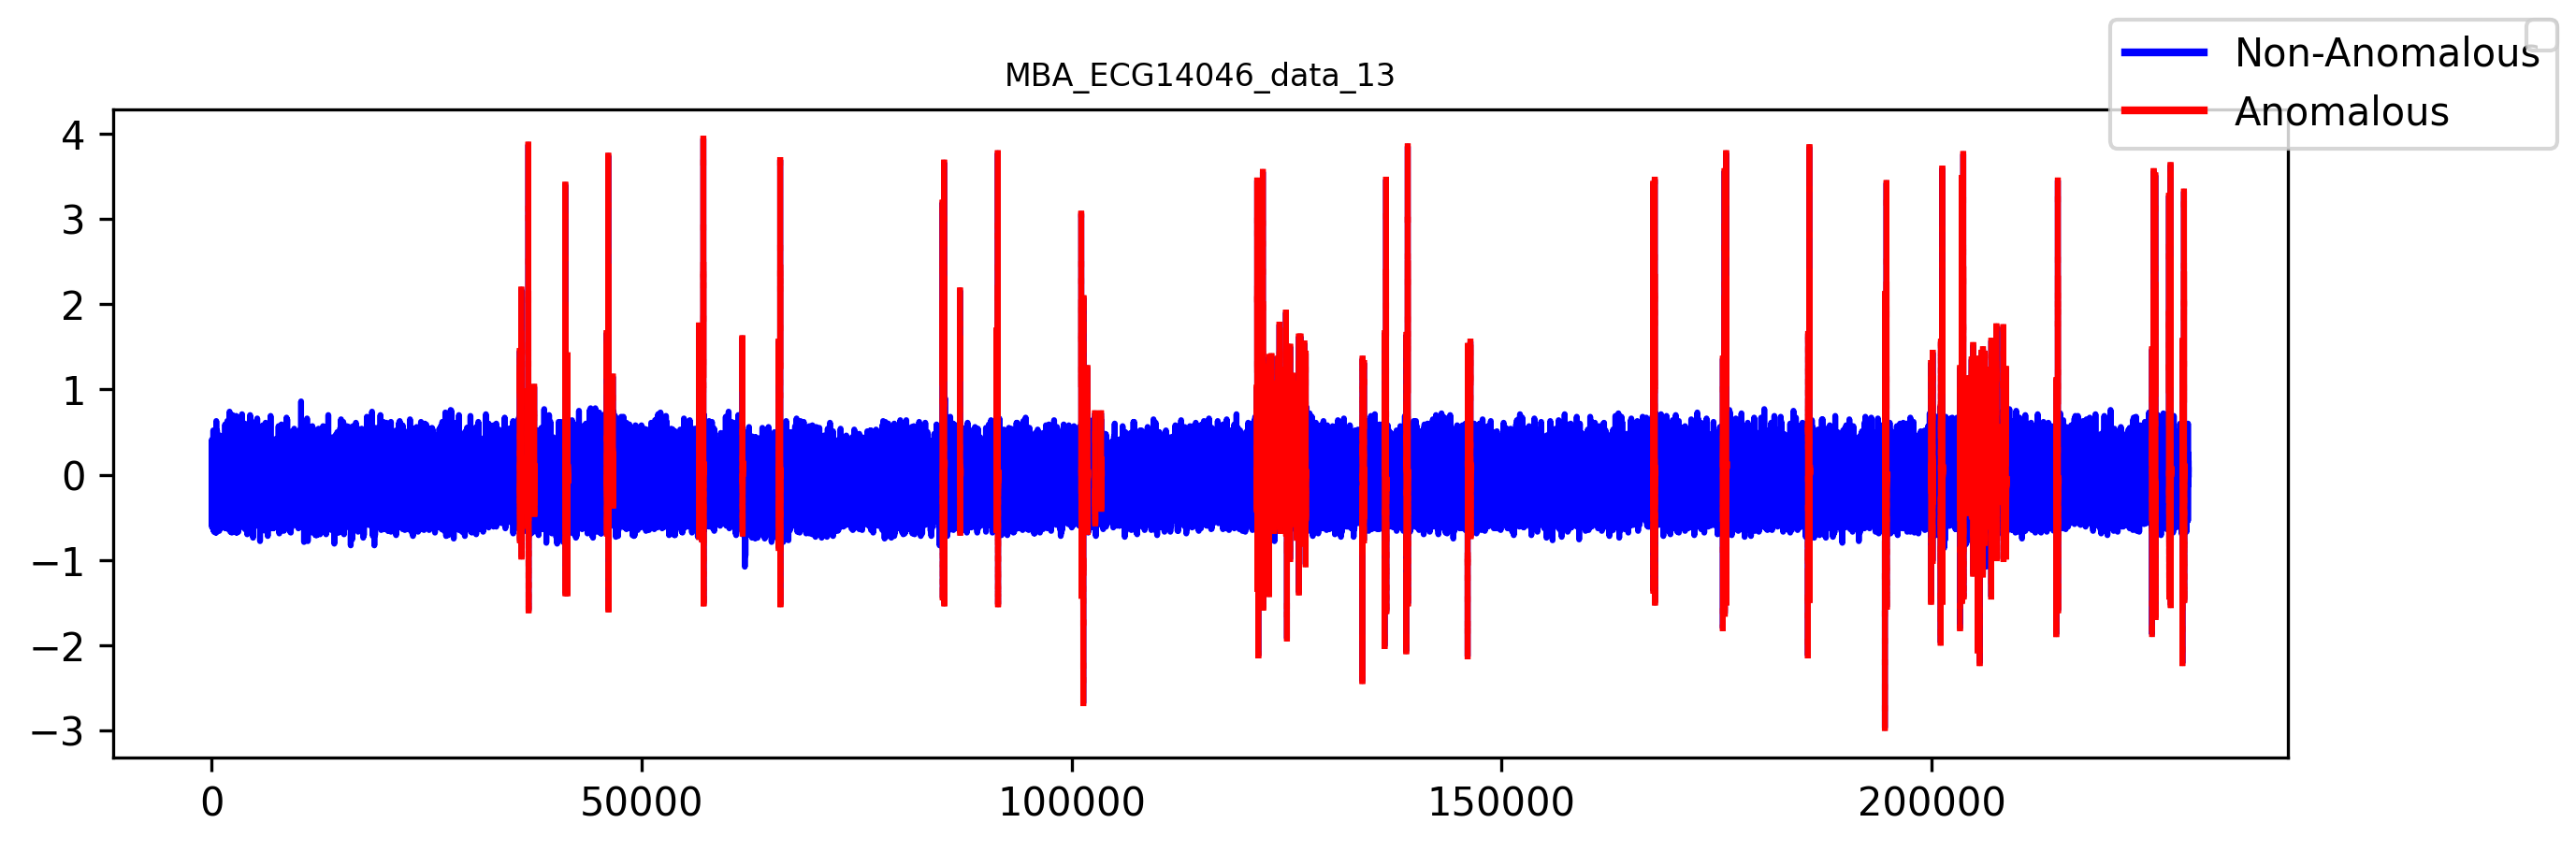

In [5]:
ECG2.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


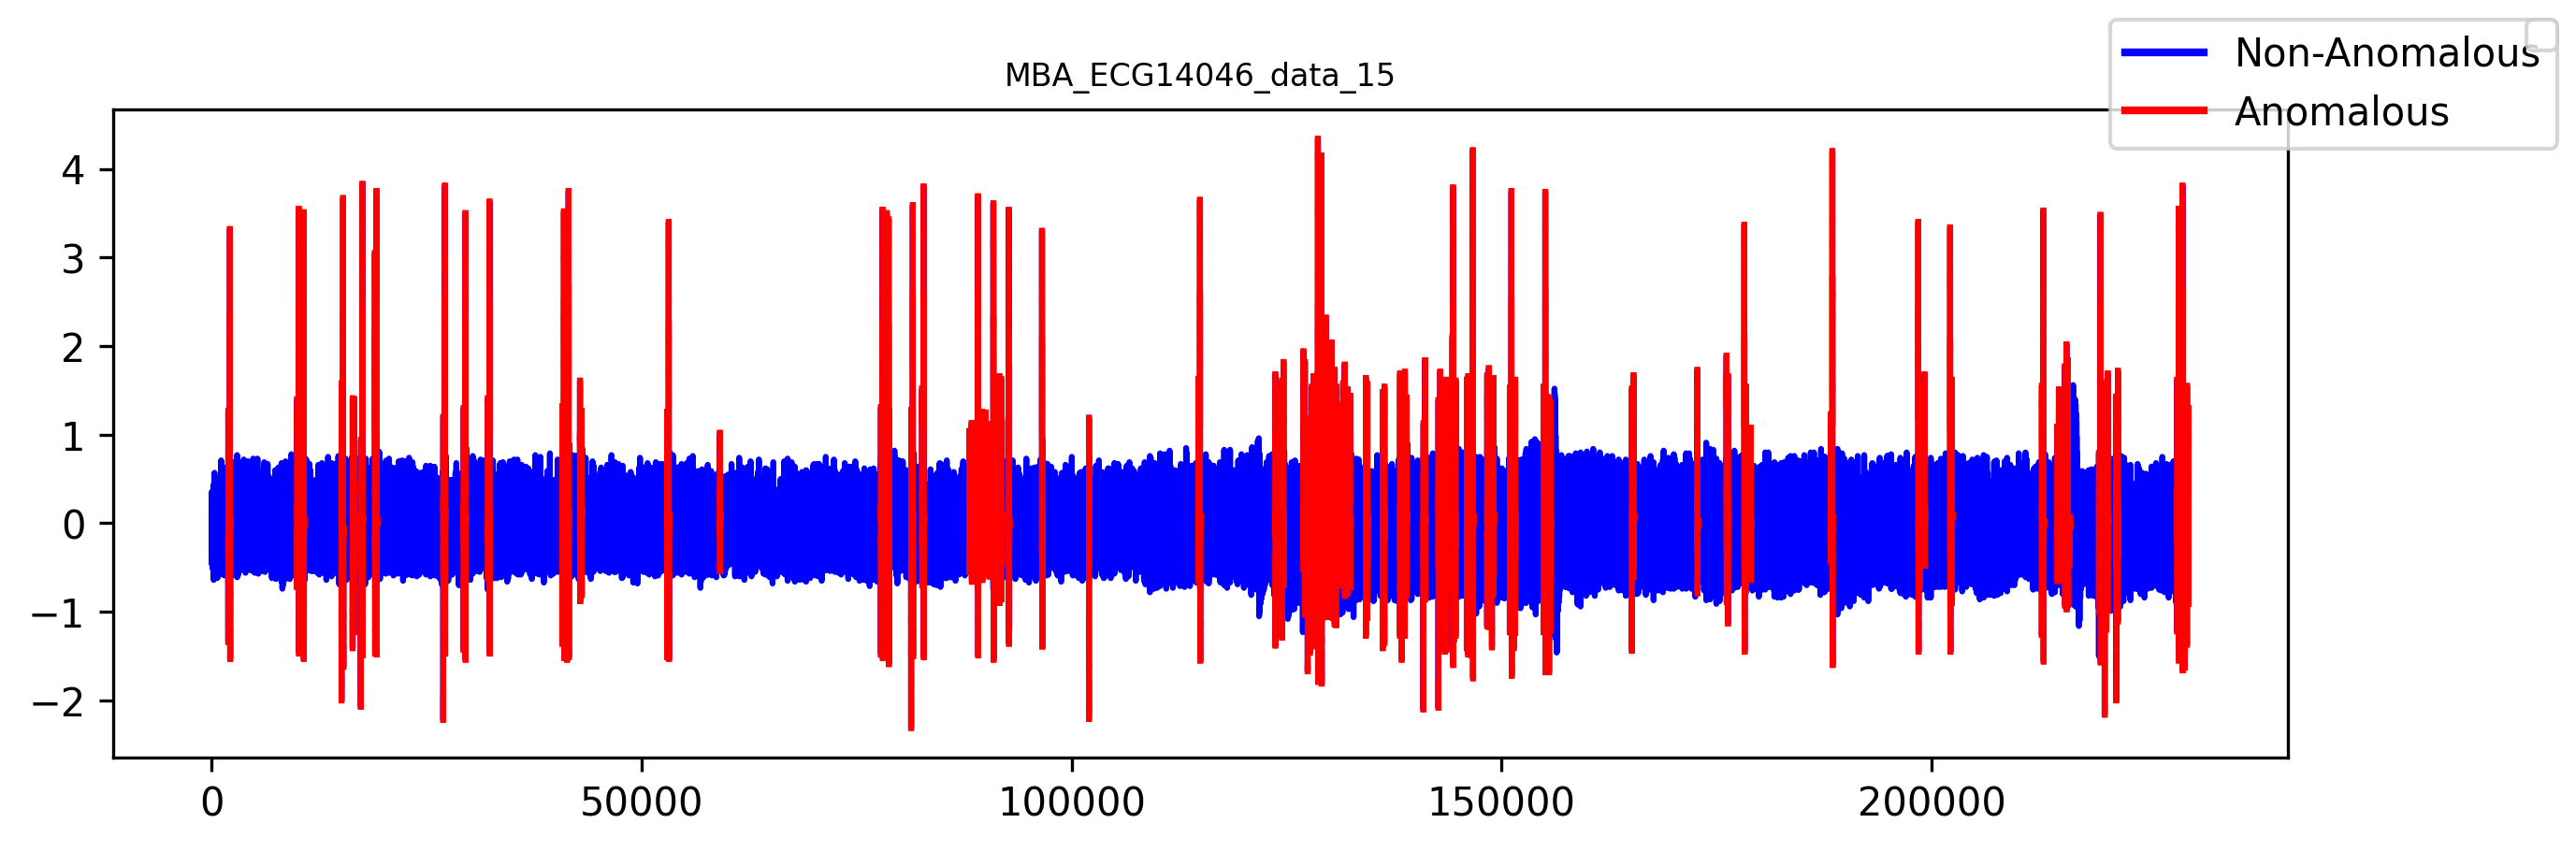

In [6]:
ECG3.plot()

In [7]:

# 0.5 means data is 0.5 times its original length (compressed)
# 2 would mean data is 2x its original length (streched data)
ECG1_compressed = transform_stream(ECG1, 0, ECG1.data.size-1, 0.5)
ECG2_compressed = transform_stream(ECG2, 0, ECG1.data.size-1, 0.5)
ECG3_compressed = transform_stream(ECG3, 0, ECG1.data.size-1, 0.5)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


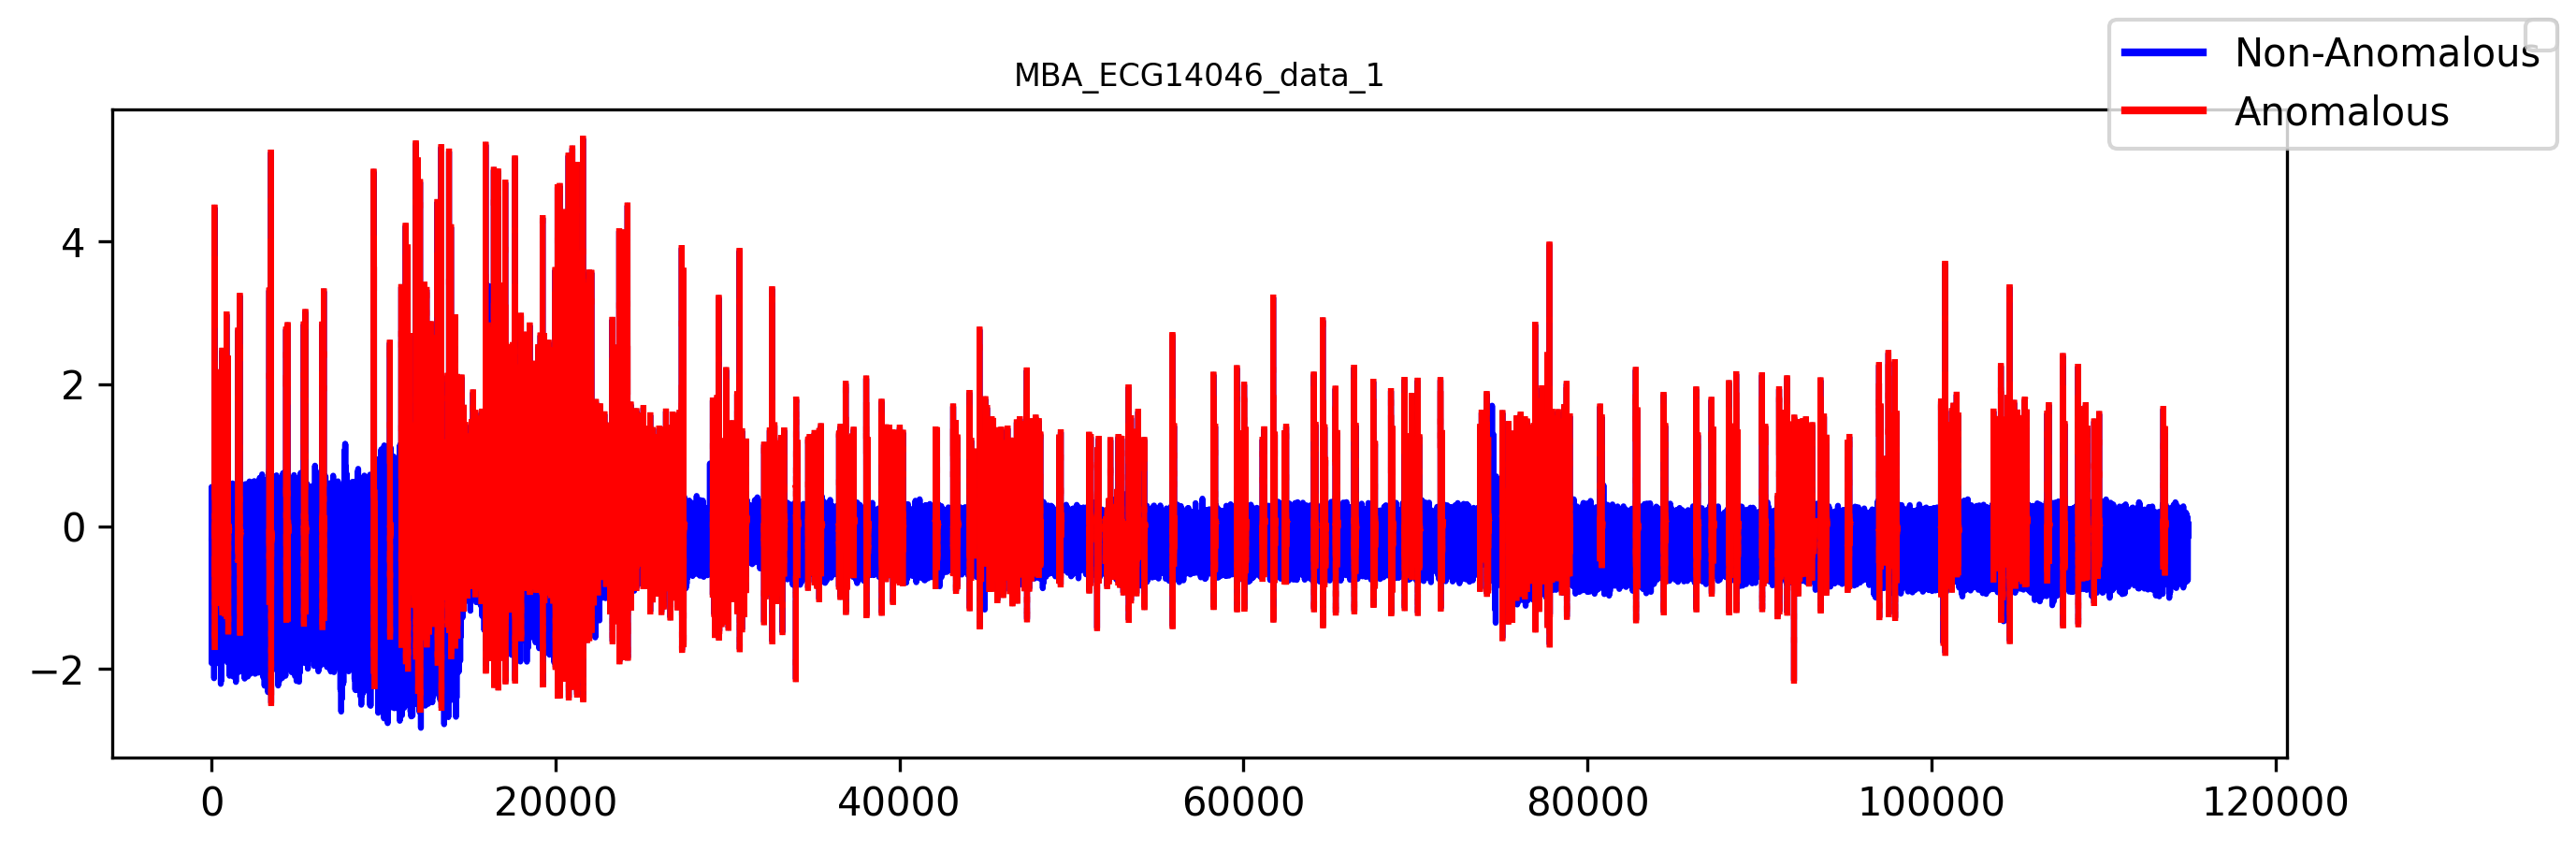

In [8]:
ECG1_compressed.plot()


In [9]:
# saving all to ARFF file format in the current directory, uncomment the following 3 lines to save
# ECG1_compressed.to_arff()
# ECG2_compressed.to_arff()
# ECG3_compressed.to_arff()